In [1]:
import numpy as np

In [2]:
import numpy as np

class AgglomerativeClusteringScratch:
    def __init__(self, n_clusters=2, linkage="single"):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.clusters = None
        self.labels_ = None

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

    def _cluster_distance(self, cluster1, cluster2, X):
        if self.linkage in ["single", "complete", "average"]:
            distances = []
            for i in cluster1:
                for j in cluster2:
                    distances.append(self._euclidean_distance(X[i], X[j]))

            if self.linkage == "single":
                return np.min(distances)
            elif self.linkage == "complete":
                return np.max(distances)
            elif self.linkage == "average":
                return np.mean(distances)

        elif self.linkage == "ward":
            n1, n2 = len(cluster1), len(cluster2)
            centroid1 = np.mean(X[cluster1], axis=0)
            centroid2 = np.mean(X[cluster2], axis=0)
            return (n1 * n2) / (n1 + n2) * np.sum((centroid1 - centroid2) ** 2)

        else:
            raise ValueError("Unsupported linkage")

    def fit(self, X):
        X = np.array(X)
        n_samples = X.shape[0]

        # Start with each point as its own cluster
        self.clusters = [[i] for i in range(n_samples)]

        while len(self.clusters) > self.n_clusters:
            min_dist = float("inf")
            pair_to_merge = None

            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    dist = self._cluster_distance(
                        self.clusters[i], self.clusters[j], X
                    )
                    if dist < min_dist:
                        min_dist = dist
                        pair_to_merge = (i, j)

            i, j = pair_to_merge
            new_cluster = self.clusters[i] + self.clusters[j]

            self.clusters.pop(j)
            self.clusters.pop(i)
            self.clusters.append(new_cluster)

        return self

    def fit_predict(self, X):
        self.fit(X)
        labels = np.zeros(len(X), dtype=int)
        for cluster_id, cluster in enumerate(self.clusters):
            for index in cluster:
                labels[index] = cluster_id
        self.labels_ = labels
        return labels


In [5]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
X , y = make_moons(n_samples = 100,noise=0.2)

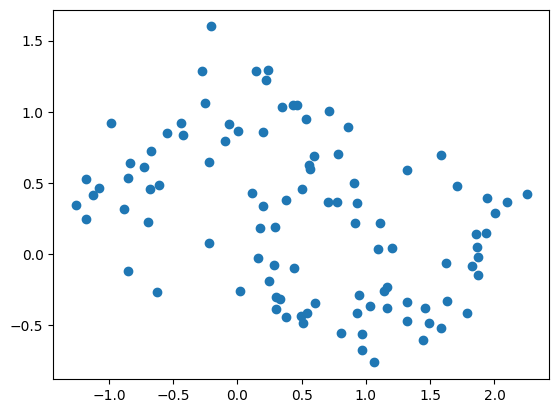

In [21]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [29]:
model = AgglomerativeClusteringScratch(n_clusters=3,linkage="ward")
model.fit_predict(X)

array([2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 2])

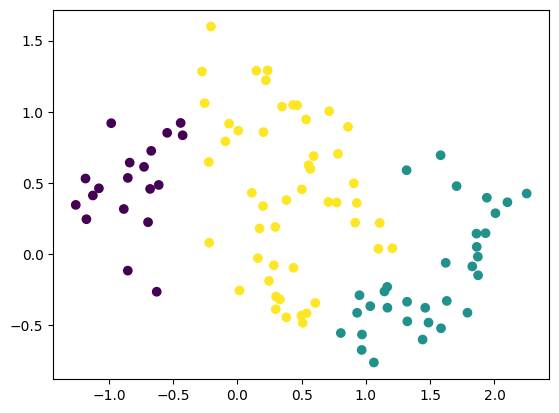

In [30]:
plt.scatter(X[:,0],X[:,1],c=model.labels_)
plt.show()

In [31]:
silhouette_avg = silhouette_score(X, model.labels_)
print(f"Silhouette Score for Ward linkage (n_clusters=2): {silhouette_avg:.3f}")

Silhouette Score for Ward linkage (n_clusters=2): 0.383


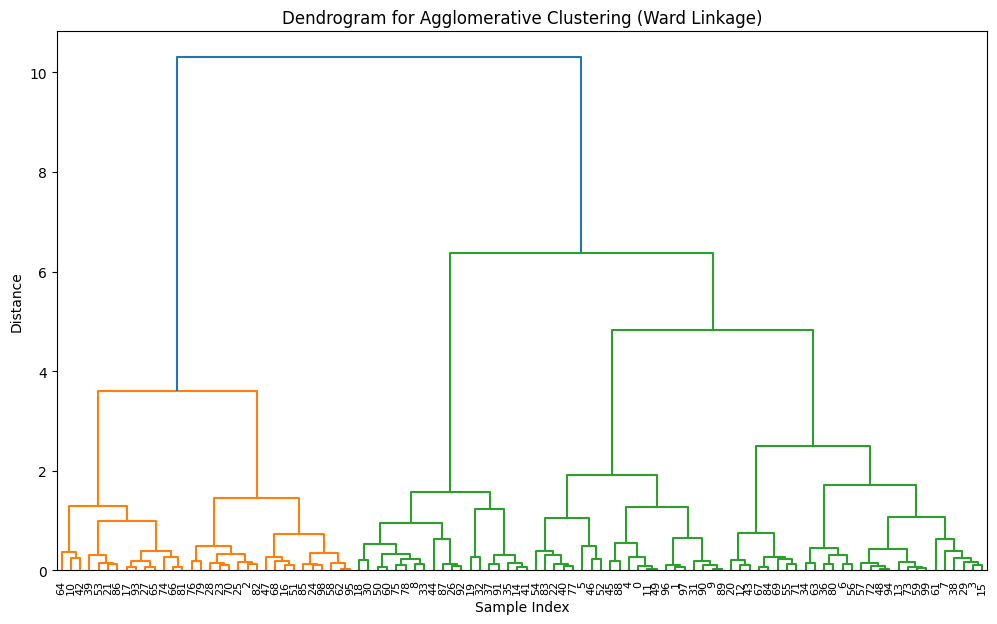

In [32]:
from scipy.cluster import hierarchy

# Compute the linkage matrix
# 'ward' linkage minimizes the variance within each cluster
Z = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram for Agglomerative Clustering (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### How to Interpret the Dendrogram for Cluster Selection:

1.  **Identify Natural Groupings**: Look for large vertical lines that span a significant distance before being joined by other lines. These represent major cluster divisions.
2.  **Cut the Dendrogram**: Imagine drawing a horizontal line across the dendrogram. The number of vertical lines it intersects indicates the number of clusters. You want to choose a cut-off point where extending the line further up (decreasing the number of clusters) would result in a large jump in the 'distance' (y-axis).
3.  **Longest Vertical Lines**: Focus on the longest vertical lines that don't get crossed by any horizontal lines. These often indicate distinct clusters.

By observing the dendrogram, you can visually inspect at what 'distance' level you should cut to get a reasonable number of clusters, often where there are significant gaps in the merging distances.

In [36]:
mode1 =  AgglomerativeClustering(n_clusters=3)
mode1.fit_predict(X)

array([0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0])

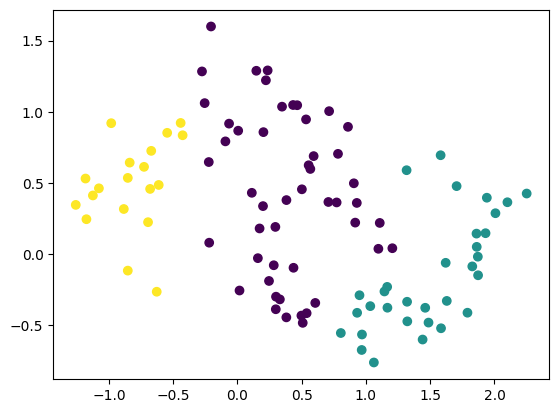

In [38]:
plt.scatter(X[:,0],X[:,1],c=mode1.labels_)
plt.show()

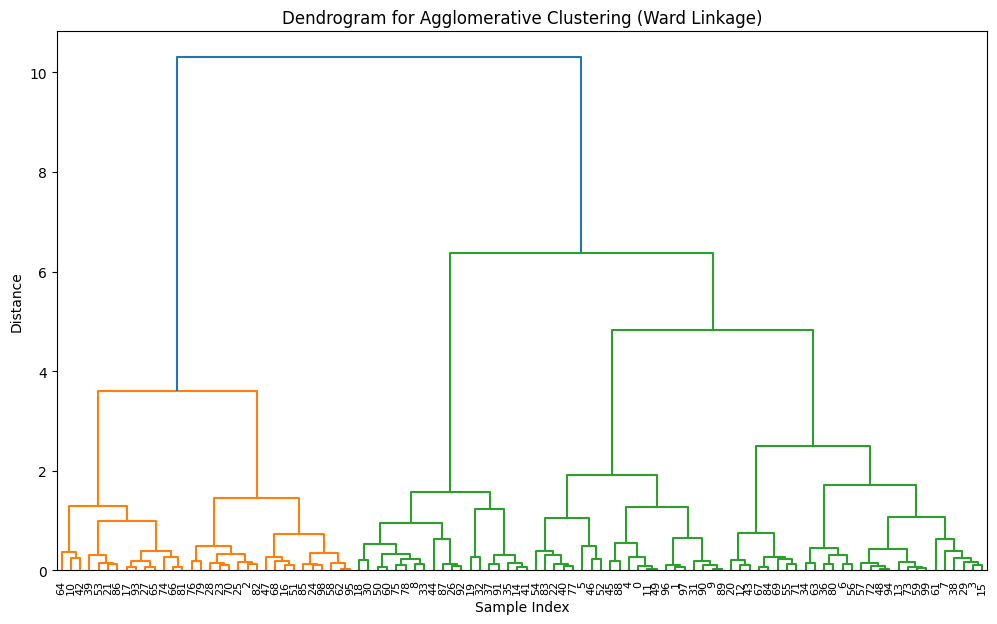

In [39]:
from scipy.cluster import hierarchy

# Compute the linkage matrix
# 'ward' linkage minimizes the variance within each cluster
Z = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.title('Dendrogram for Agglomerative Clustering (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()